In [66]:
#importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [67]:
#Reading the data
files = glob.glob("*cybersecurity_attacks_cleaned.csv")


In [68]:
#Creating a list of dataframes
dfs = []
for file in files:
    dfs.append(pd.read_csv(file))
    

In [69]:
#Concatenating all dataframes into one
df = pd.concat(dfs, ignore_index=True)

#Checking the shape of the dataframe
print(df.shape)

(40000, 30)


In [70]:
#display random 15 rows
df.sample(15)


,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source,Year,Month,Date,Hour,Day
14163,2022-07-04 21:33:38,148.137.115.82,44.14.246.201,15170,33617,UDP,472,Data,HTTP,Deserunt possimus error ipsam quod. Praesentiu...,...,"Saharsa, Gujarat",51.159.80.157,Log Data,Alert Data,Firewall,2022,July,4,21,Monday
31142,2021-10-28 20:33:29,213.70.134.81,35.124.143.26,4932,22478,UDP,563,Control,DNS,Ab velit quis vitae ipsa nostrum facere. Iusto...,...,"Panipat, Punjab",No Proxy,NaN,Alert Data,Firewall,2021,October,28,20,Thursday
2068,2022-10-10 17:31:23,152.64.203.5,203.70.243.24,61248,4775,ICMP,906,Data,HTTP,Temporibus ab perspiciatis ducimus dignissimos...,...,"Durgapur, Nagaland",28.2.99.190,NaN,NaN,Server,2022,October,10,17,Monday
30682,2022-11-15 16:48:18,93.86.29.22,100.254.119.230,8570,45612,ICMP,762,Data,HTTP,Iste dolores velit vel. Perferendis necessitat...,...,"Imphal, Bihar",38.177.242.221,Log Data,NaN,Server,2022,November,15,16,Tuesday
20083,2021-06-19 14:02:26,152.12.92.59,103.105.152.118,60467,47482,ICMP,414,Data,HTTP,Architecto omnis cupiditate modi eos minus eli...,...,"Firozabad, Andhra Pradesh",No Proxy,NaN,NaN,Firewall,2021,June,19,14,Saturday
27169,2022-06-30 19:18:40,214.204.112.74,52.129.11.172,34059,50088,ICMP,1450,Control,HTTP,Minus culpa officiis iure vero dolor commodi. ...,...,"Vellore, Rajasthan",48.243.99.84,Log Data,NaN,Firewall,2022,June,30,19,Thursday
28103,2020-11-09 01:14:21,208.145.254.133,185.148.70.173,23544,56804,UDP,1048,Control,HTTP,Blanditiis inventore maiores alias quisquam al...,...,"Dehradun, Meghalaya",No Proxy,NaN,NaN,Firewall,2020,November,9,1,Monday
25603,2020-06-30 19:24:11,106.181.91.165,151.252.24.41,55172,57368,TCP,468,Control,DNS,Maxime laudantium nihil nobis ipsa laudantium ...,...,"Tiruchirappalli, Telangana",No Proxy,NaN,NaN,Firewall,2020,June,30,19,Tuesday
17084,2022-06-18 15:02:48,118.197.41.169,199.231.201.129,9984,36923,TCP,435,Control,HTTP,Voluptatum quaerat enim voluptas sunt labore. ...,...,"Machilipatnam, Uttarakhand",No Proxy,Log Data,NaN,Server,2022,June,18,15,Saturday
10617,2020-02-25 20:05:40,41.3.142.207,31.252.254.153,63840,46889,ICMP,178,Data,DNS,Ad error minima veritatis occaecati laudantium...,...,"Katihar, Tamil Nadu",No Proxy,NaN,NaN,Firewall,2020,February,25,20,Tuesday


In [71]:
#Checking the data types of the columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

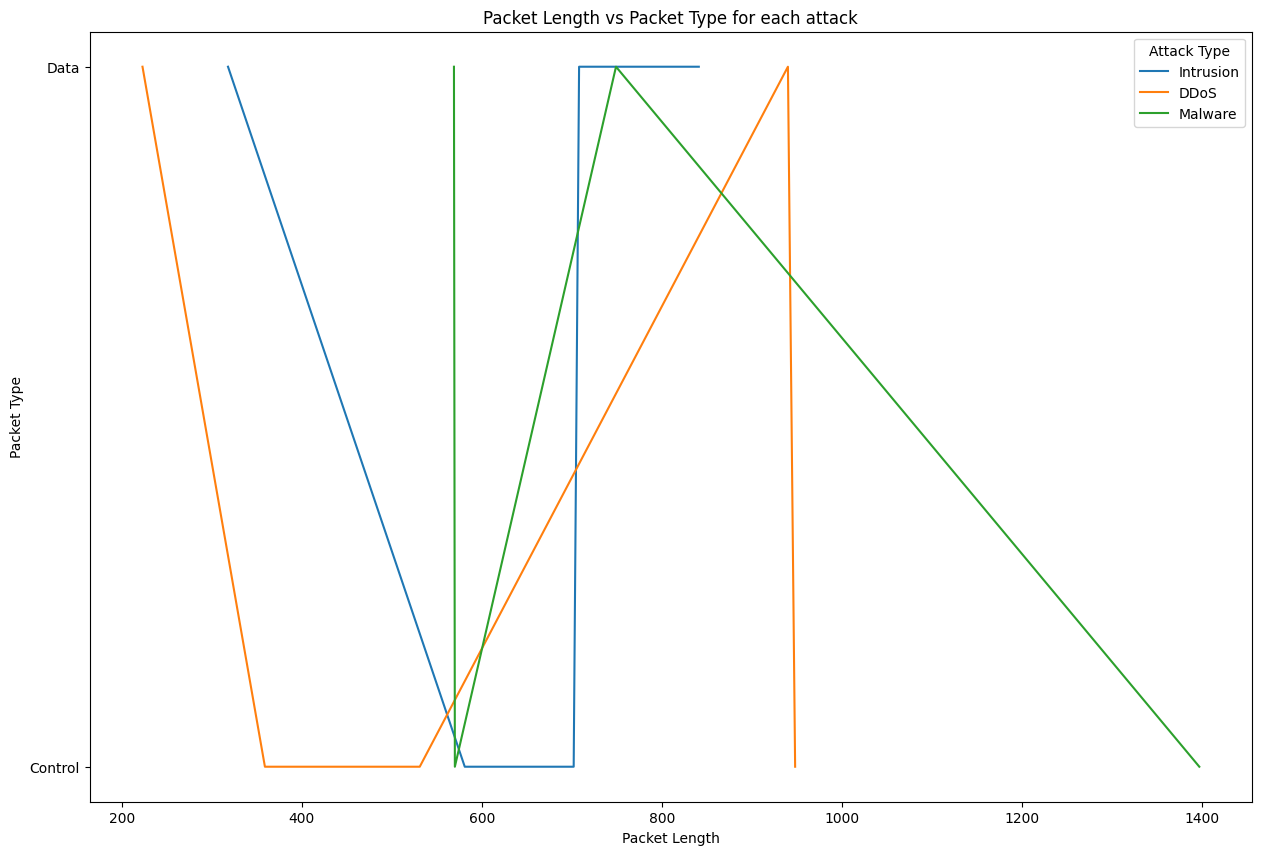

In [72]:
#plot line line graph of packet length vs packet type for each attack ramdomly of 15 rows
plt.figure(figsize=(15,10))
sns.lineplot(x='Packet Length', y='Packet Type', data=df.sample(15), hue='Attack Type')
plt.title('Packet Length vs Packet Type for each attack')
plt.show()


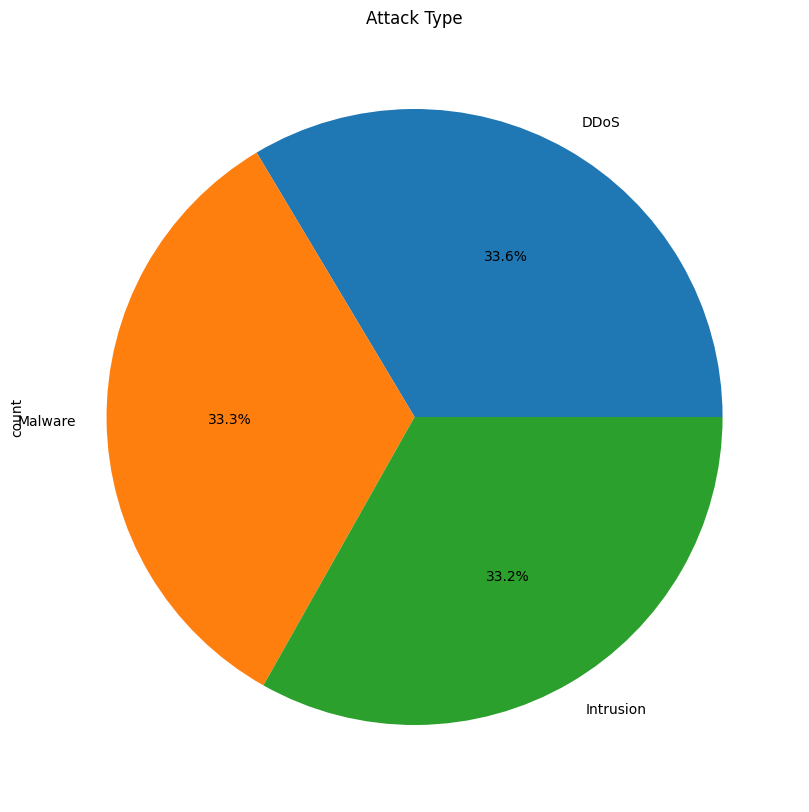

In [73]:
#plot pie chart of attack type of random 15 rows
plt.figure(figsize=(15,10))
df['Attack Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Attack Type')
plt.show()


In [74]:
#building a model of sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [75]:
#Encoding the categorical data
encoder = LabelEncoder()
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df['Attack Type'].value_counts()


Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64

In [76]:
#Splitting the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [77]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [78]:
#defining the model
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


#Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])




In [79]:
#building a model of sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [80]:
#Encoding the categorical data
encoder = LabelEncoder()
df['Attack Type'] = encoder.fit_transform(df['Attack Type'])
df['Attack Type'].value_counts()


Attack Type
0    13428
2    13307
1    13265
Name: count, dtype: int64

In [81]:
#lstm model
from keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from keras.preprocessing import sequence

#Splitting the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


#defining the model
model = Sequential()
model.add(Embedding(5000, 32, input_length=10))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))




In [82]:
#Adding the input and first hidden layer
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dropout(0.2))


In [83]:
print(type(X_test))
print(type(y_test))
print(X_test.dtype)  # if applicable for NumPy arrays
print(y_test.dtype)  # if applicable for NumPy arrays


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
object
object


In [84]:
# from keras.models import Sequential
# from keras.layers import Dense

# # Define your model
# model = Sequential()
# model.add(Dense(64, input_dim=10, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Now you can train your model using model.fit() before evaluating it
# # For example:
# # model.fit(X_train, y_train, epochs=10, batch_size=32)

# # After training, you can evaluate the model
# scores = model.evaluate(X_test, y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1] * 100))


In [85]:
# #plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(15,10))
# sns.heatmap(cm, annot=True)
# plt.title('Confusion Matrix')
# plt.show()

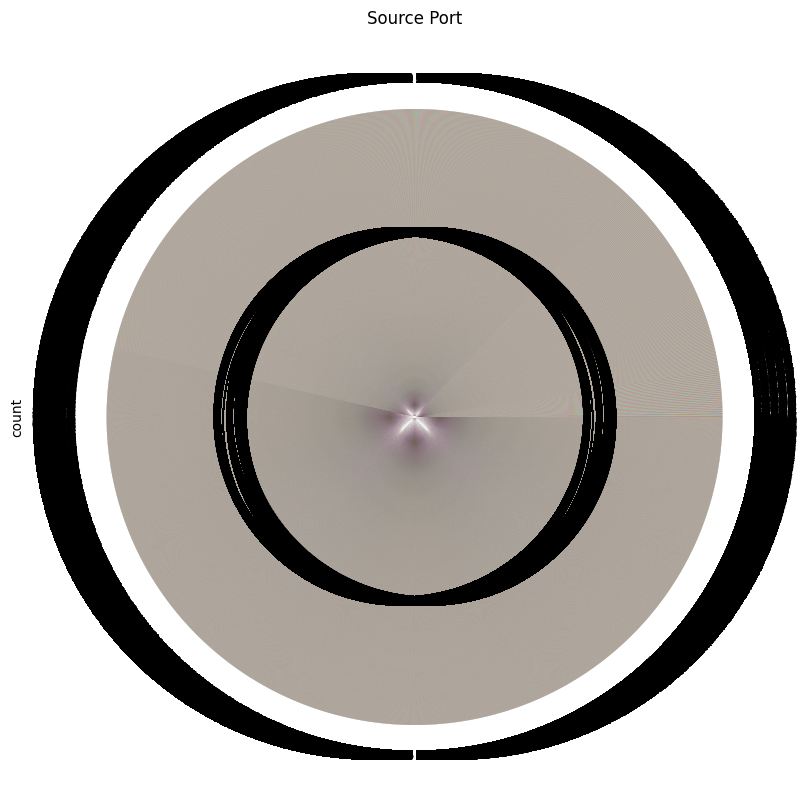

In [86]:
#plot pie chart of IP Address  vs source port of random 15 rows
plt.figure(figsize=(15,10))
df['Source Port'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Source Port')
plt.show()


In [87]:
#plot pie chart of IP Address  vs destination port of random 15 rows
plt.figure(figsize=(15,10))
df['Destination Port'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Destination Port')
plt.show()

KeyboardInterrupt: 

In [ ]:
#plot pie chart of IP Address  vs protocol of random 15 rows
plt.figure(figsize=(15,10))
df['Protocol'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Protocol')
plt.show()
